# SLC FINAL EXAM

### DATA DESCRIPTION: 


 
Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145157, 1990.). The model evaluates cars according to the following concept structure: 
 
CAR car acceptability 

. PRICE overall price 

. . buying buying price 

. . maint price of the maintenance 

. TECH technical characteristics 

. . COMFORT comfort 

. . . doors number of doors 

. . . persons capacity in terms of persons to carry 

. . . lug_boot the size of luggage boot 

. . safety estimated safety of the car 
 
Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples 

ATTRIBUTE INFORMATION: 

Class Values: unacc, acc, good, vgood 
 
Attributes: 
 
buying: vhigh, high, med, low. 

maint: vhigh, high, med, low. 

doors: 2, 3, 4, 5more. 

persons: 2, 4, more. 

lug_boot: small, med, big. 

safety: low, med, high. 

### 1.	Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [1]:
# Kindly change the below cells from markdown to code and execute it 

In [2]:
import csv
import pandas as pd

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv",header=None,names=["Buying","Maint","Doors","Persons","Lug_boot","Safety","Class Values"])

df.head()


,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.head()


,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### 2.	Summarize important observations from the data set (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five-point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [4]:
#a
df.shape
df.info()   # All object though doors and persons have numeric values they can still be treated as categorical

#b 
df["Doors"].value_counts()
#We can replace string values in persons and door columns by a number,
#that might most approximately capture the true range of values

def door(i):
    if i=="5more":
        return 6
    else:
        return i
    
df["Doors"]=df["Doors"].apply(door)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
Buying          1728 non-null object
Maint           1728 non-null object
Doors           1728 non-null object
Persons         1728 non-null object
Lug_boot        1728 non-null object
Safety          1728 non-null object
Class Values    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df["Persons"].value_counts()
def per(i):
    if i=="more":
        return 6
    else:
        return i
    
df["Persons"]=df["Persons"].apply(per)

In [6]:
import seaborn as sns
display(sns.boxplot(df["Persons"].astype(int)))
display(sns.boxplot(df["Doors"].astype(int)))

In [7]:
#c
df.nunique() #Categories in different columns
for i in df.columns:
    print(i,df[i].value_counts())
    
#In all columns except the target column(class values) the categories are equally distributed

Buying med      432
high     432
low      432
vhigh    432
Name: Buying, dtype: int64
Maint med      432
high     432
low      432
vhigh    432
Name: Maint, dtype: int64
Doors 4    432
2    432
3    432
6    432
Name: Doors, dtype: int64
Persons 4    576
2    576
6    576
Name: Persons, dtype: int64
Lug_boot small    576
big      576
med      576
Name: Lug_boot, dtype: int64
Safety med     576
high    576
low     576
Name: Safety, dtype: int64
Class Values unacc    1210
acc       384
good       69
vgood      65
Name: Class Values, dtype: int64


### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem. 


In [8]:
#a
df.isnull().sum() #No missing values

# b Since all the variables are categorical the question of outliers doesnt arise

#c
df["Class Values"].value_counts()
#The target variable has multiple classes 
#with highest data coming from unacc category
#So there is data imbalance

# For convenience, we can convert this multi class classification to binomial classification
# We can roughly distribute values into two categories 0(unacceptable category) and 1(all other i.e. acceptable categories)

def tgt(i):
    if i=="unacc":
        return 0
    else:
        return 1
    
df["Class Values"]=df["Class Values"].apply(tgt)
df["Class Values"].value_counts()

#As we can see 0 class is more abundant than 1 class
#We can use SMOTE to upsample the minority class to check the data imbalance

0    1210
1     518
Name: Class Values, dtype: int64

### 4.	Summarize relationships among variables (10 marks)               
a.	Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


b.	Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

 Hint: based on your observations you may want to transform features or create additional features.


<Figure size 432x288 with 0 Axes>

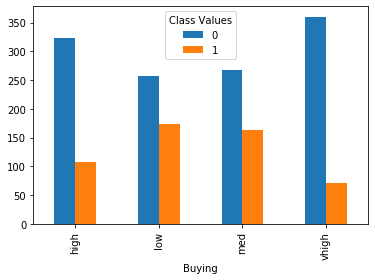

<Figure size 432x288 with 0 Axes>

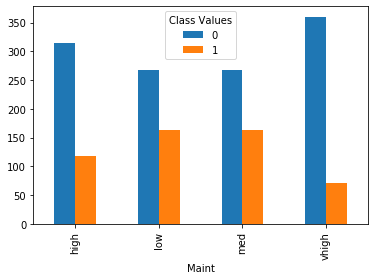

<Figure size 432x288 with 0 Axes>

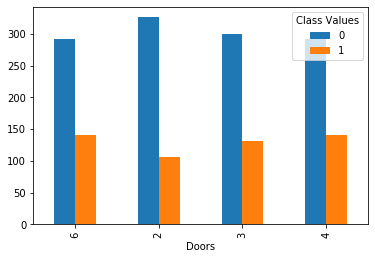

<Figure size 432x288 with 0 Axes>

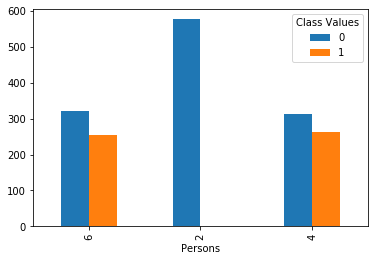

<Figure size 432x288 with 0 Axes>

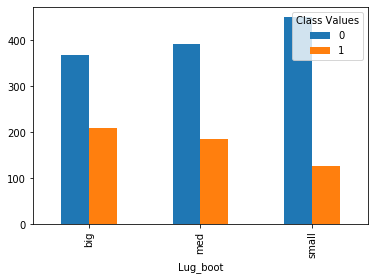

<Figure size 432x288 with 0 Axes>

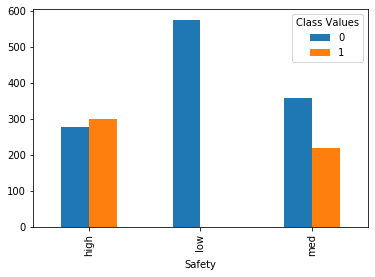

In [9]:
#a
import matplotlib.pyplot as plt
for i in df.drop("Class Values",axis=1).columns:
    plt.tight_layout()
    pd.crosstab(df[i],df["Class Values"]).plot(kind="bar")
    plt.show()
    
# Cars with high or very high buying prices  and mainitenance have low acceptability
#Acceptability for cars having 2 doors is the least
#For a car to be acceptable it must be able to accomodate atleast 4 or more people
#Car acceptability increases with lug_boot size
#For a car to be acceptable, it must have medium to high safety level

In [10]:
df.head()
df["Buying"].value_counts()
def buy(i):
    if i=="low":
        return 0
    elif i=="med":
        return 1
    elif i=="high":
        return 2
    else:
        return 3
    
df["Buying"]=df["Buying"].apply(buy)

In [11]:
df["Maint"]=df["Maint"].apply(buy)

In [12]:
df["Safety"].value_counts()
def saf(i):
    if i=="low":
        return 0
    elif i=="med":
        return 1
    else:
        return 2
    
df["Safety"]=df["Safety"].apply(saf)


In [13]:
df["Lug_boot"].value_counts()
def lug(i):
    if i=="small":
        return 0
    elif i=="med":
        return 1
    else:
        return 2
    
df["Lug_boot"]=df["Lug_boot"].apply(lug)

In [14]:
df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class Values
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [31]:
#b
#H0: Both colums are independent
#H1: Both columns are dependent
from scipy.stats import chi2_contingency

for i in df.drop("Class Values",axis=1).columns:
    tbl=pd.crosstab(df[i],df["Class Values"])
    stat,pval,dof,exp=chi2_contingency(tbl)
    if pval<0.05:
        print("Reject the null Hypothesis. target is dependent on",i)
    else:
        print("Fail to reject the null Hypothesis. target is NOT dependent on",i)

#As we can see, all the columns are have relation with the target that is statistically significant


Reject the null Hypothesis. target is dependent on Buying
Reject the null Hypothesis. target is dependent on Maint
Reject the null Hypothesis. target is dependent on Doors
Reject the null Hypothesis. target is dependent on Persons
Reject the null Hypothesis. target is dependent on Lug_boot
Reject the null Hypothesis. target is dependent on Safety


### 5.	Split dataset into train and test (70:30) (5 marks)
a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [48]:
X=df.drop("Class Values",axis=1)
y=df["Class Values"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,stratify=y)



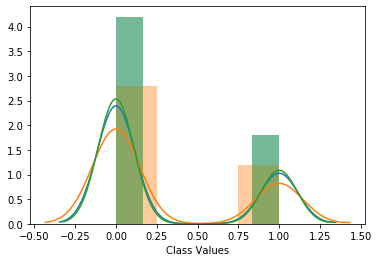

In [49]:

#H0:Both samples come from the same population(same distribution)
#H1:Both samples follow different distribution
import scipy.stats as stats
stats.ttest_ind(ytrain,ytest)
#Since pvalue is more than 0.05 we fail to reject the null hypothesis and safely conclude
#that Both samples come from the same distribution

#This can be seen graphically
sns.distplot(ytrain)
sns.distplot(ytest)
sns.distplot(y)

### 6.	Fit a base model and explain the reason of selecting that model. Please write your key observations (15 marks) 

a.	What is the overall Accuracy? Please comment on whether it is good or not. 

b.	What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

c.	Which variables are significant?

d.	What is Cohen’s Kappa Value and what inference do you make from the model
e.	Which other key model output parameters do you want to look at? 


In [94]:
from sklearn.metrics import accuracy_score,classification_report,r2_score,roc_auc_score,cohen_kappa_score,f1_score

In [53]:
#We select Logistic regression to be the base model since it is appropriate for biomial classification ad is a simple model
#In our model we meet the assumptions required for Logistic regression, i.e. there's no multicollinearity,absence of autocorrelation
#and so we can select this model
#a 
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xtrain,ytrain)
pred=log.predict(xtest)
print(accuracy_score(ytest,pred))
#This accuracy seems good but it cant be relied upon since it only tells us total correct prediction out of overall predictions
#But it may be possible that the model predicts one class better than the other class.
#So we cat totally rely upon accuracy score

0.8472222222222222


In [126]:
print(f1_score(ytest,pred))
#Such low r2_score clearly shows there is huge difference between precision and recall
#Precision tells us proportion of positives correctly identified among the overall positives
#Recall tells us proportion of positives correctly predicted out of overall actual positives
#This can be seen in classification report
print(classification_report(ytest,pred))
#We need to improve our model predictions for the positive class 1. It appears model is able to well predict 0 class
#but not class 1 due to data imbalance(less data of class 1).
#So optimization objective is to increase precision and recall for positive class
#So we can use SMOTE to upsample the minority class

0.7692307692307692
              precision    recall  f1-score   support

           0       0.93      0.84      0.89       303
           1       0.70      0.85      0.77       129

    accuracy                           0.85       432
   macro avg       0.82      0.85      0.83       432
weighted avg       0.86      0.85      0.85       432



In [64]:
#c
#H0: Both colums are independent
#H1: Both columns are dependent
from scipy.stats import chi2_contingency

for i in df.drop("Class Values",axis=1).columns:
    tbl=pd.crosstab(df[i],df["Class Values"])
    stat,pval,dof,exp=chi2_contingency(tbl)
    if pval<0.05:
        print("Reject the null Hypothesis. target is dependent on",i)
    else:
        print("Fail to reject the null Hypothesis. target is NOT dependent on",i)

#As we can see, all the columns are have relation with the target that is statistically significant

Reject the null Hypothesis. target is dependent on Buying
Reject the null Hypothesis. target is dependent on Maint
Reject the null Hypothesis. target is dependent on Doors
Reject the null Hypothesis. target is dependent on Persons
Reject the null Hypothesis. target is dependent on Lug_boot
Reject the null Hypothesis. target is dependent on Safety


In [63]:
#d
print(roc_auc_score(ytest,pred))  #This shows difference between true positives and false positives is high
print(cohen_kappa_score(ytest,pred)) #This tells us the inter rater reliability. Thus the reliabiloty is good


0.804282753856781
0.6252661462029808


### 7.	How do you improve overall efficiency of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 marks)
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


In [84]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
xtrain_sm,ytrain_sm=sm.fit_sample(xtrain,ytrain)

In [85]:
ytrain_sm.value_counts()

1    907
0    907
Name: Class Values, dtype: int64

In [125]:
log=LogisticRegression()
log.fit(xtrain_sm,ytrain_sm)
pred=log.predict(xtest)
print(accuracy_score(ytest,pred))
print(f1_score(ytest,pred))

#No sigificant increase in f1_Score by SMOTE


0.8472222222222222
0.7692307692307692


In [107]:
import numpy as np
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(log,X,y,cv=5,scoring="f1")))
print((cross_val_score(log,X,y,cv=5,scoring="f1")))


#By using the cross validation we dont have to split our data into train and test set, thus we can utilise our whole data
#We can also see that f1 score on first fold is low compared to all other scores indicating potential anomalies here

0.7181887817551507
[0.54117647 0.76439791 0.8        0.77948718 0.70588235]


In [108]:
#Let us try fitting a more complex model
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
print(np.mean(cross_val_score(gnb,X,y,cv=5,scoring="f1")))
print((cross_val_score(gnb,X,y,cv=5,scoring="f1")))
#The accuracy reduces to0.69 so Naive bayes isnt very effective perhaps because it has an assumption that
#data is normally dstributed, and this is not true about the our data

0.6916125351767921
[0.19130435 0.77248677 0.79787234 0.75144509 0.94495413]


In [110]:
#Lets now go for ensemble models bagging which have an edge over basic classifiers
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
print(np.mean(cross_val_score(rf,X,y,cv=5,scoring="f1")))
#As expected the f1 score increases to 0.81

0.8092845449868188


In [122]:
df["Doors"]=df["Doors"].astype(int)
df["Persons"]=df["Persons"].astype(int)
df.info()
y=df["Class Values"]
X=df.drop("Class Values",axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
Buying          1728 non-null int64
Maint           1728 non-null int64
Doors           1728 non-null int64
Persons         1728 non-null int64
Lug_boot        1728 non-null int64
Safety          1728 non-null int64
Class Values    1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


In [124]:
#Lets try a boosting technique as our final model
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
print(np.mean(cross_val_score(lgb,X,y,cv=5,scoring="f1")))
# Thus f1 score is 89% on our final lightgbm model

0.8940224443847867


In [130]:
print(np.mean(cross_val_score(rf,X,y,cv=5,scoring="recall")))
print(np.mean(cross_val_score(rf,X,y,cv=5,scoring="precision")))

0.7266990291262136
0.8295079768882454


### 8.	Summarize as follows (10 marks) 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model

2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

3.	What changes from the base model had the most effect on model performance?

4.	What are the key risks to your results and interpretation?


In [127]:
#2
for i in df.drop("Class Values",axis=1).columns:
    tbl=pd.crosstab(df[i],df["Class Values"])
    stat,pval,dof,exp=chi2_contingency(tbl)
    print(i,pval)
    
#Since safety and Persons have lowest pvalue these are the most significant variables in determining the target.

Buying 1.7095876176351842e-16
Maint 7.546204594041803e-14
Doors 0.035258836859245066
Persons 3.910942687357585e-81
Lug_boot 4.129051779512971e-07
Safety 8.608143726275976e-87


<Figure size 432x288 with 0 Axes>

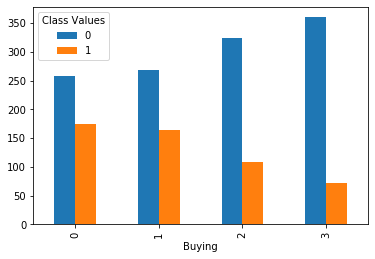

<Figure size 432x288 with 0 Axes>

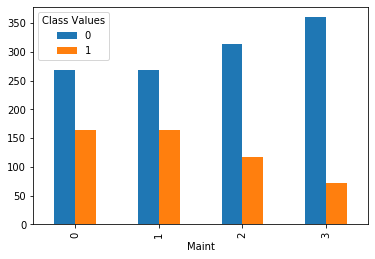

<Figure size 432x288 with 0 Axes>

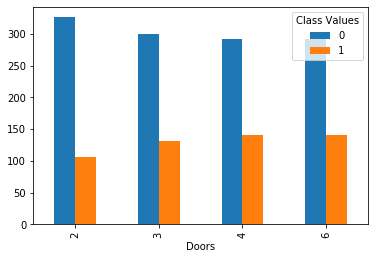

<Figure size 432x288 with 0 Axes>

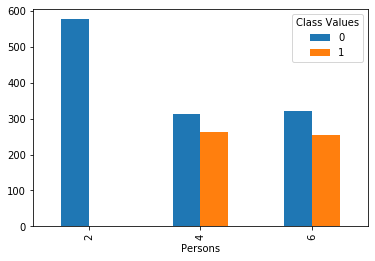

<Figure size 432x288 with 0 Axes>

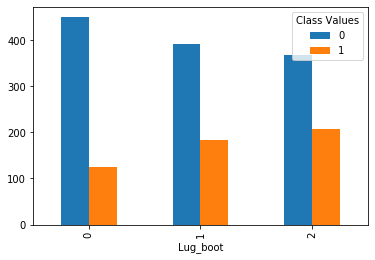

<Figure size 432x288 with 0 Axes>

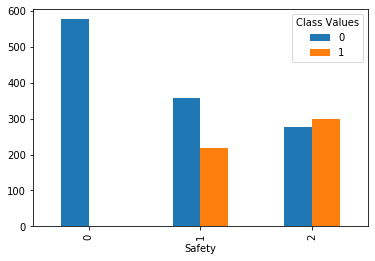

In [128]:
for i in df.drop("Class Values",axis=1).columns:
    plt.tight_layout()
    pd.crosstab(df[i],df["Class Values"]).plot(kind="bar")
    plt.show()
    
# Cars with high or very high buying prices  and mainitenance have low acceptability
#Acceptability for cars having 2 doors is the least
#For a car to be acceptable it must be able to accomodate atleast 4 or more people
#Car acceptability increases with lug_boot size
#For a car to be acceptable, it must have medium to high safety level